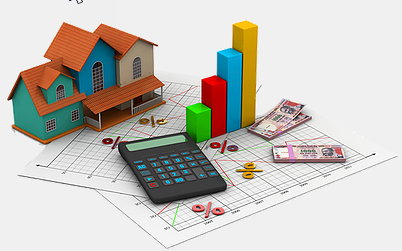

# <div align="center"> Advanced-House-Price-Prediction


## The Capstone Project for IBM Advanced Data Science Specialization Certification by Coursera

### *Abstract*
------
In this project, We build a model to predict House-Price. 
For the selection of prediction methods we compare and explore various
prediction methods. We use pipelines to create our model. 
Our result exhibit that our approach of the issue need
to be successful, and has the ability to process predictions that
would be comparative with other house cost prediction models. 
We in that point recommend a housing cost prediction model to support a house vender or a real estate person. 




### *Objective*
-----
The objective of this project is to build a model to forecast the House-Price. You are provided with 79 explanatory variables describing (almost) every aspect of residential homes.

###### Dataset to downloaded from the below link
[https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

### *Motivation for The Case Study*
------
Housing prices are an important reflection of the economy, and housing price ranges are of great interest for both buyers and sellers . Ask a home buyer to describe their dream house, and they probably won’t begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition’s data-set proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.
With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

### All the Lifecycle In A Data Science Projects
------
1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Model Deployment

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor

from math import sqrt
import warnings
warnings.filterwarnings('always')

In [4]:
test=pd.read_csv('C:\\Users\\vkaush2\\Desktop\\House estimation kaggle\\test.csv', index_col=[0])
train=pd.read_csv('C:\\Users\\vkaush2\\Desktop\\House estimation kaggle\\train.csv', index_col=[0]) 


### Missing Values

In [5]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in train.columns if train[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(train[feature].isnull().mean(), 4),  ' % missing values')


LotFrontage 0.1774  % missing values
Alley 0.9377  % missing values
MasVnrType 0.0055  % missing values
MasVnrArea 0.0055  % missing values
BsmtQual 0.0253  % missing values
BsmtCond 0.0253  % missing values
BsmtExposure 0.026  % missing values
BsmtFinType1 0.0253  % missing values
BsmtFinType2 0.026  % missing values
FireplaceQu 0.4726  % missing values
GarageType 0.0555  % missing values
GarageYrBlt 0.0555  % missing values
GarageFinish 0.0555  % missing values
GarageQual 0.0555  % missing values
GarageCond 0.0555  % missing values
PoolQC 0.9952  % missing values
Fence 0.8075  % missing values
MiscFeature 0.963  % missing values


#### We are droping the features with more then 90% of missing values.

In [6]:
train_clean=train.drop(columns=['MiscFeature','Fence','PoolQC','FireplaceQu','Alley'])

In [7]:
train_clean.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


### Splitting the train and test data

In [9]:
X=train_clean.drop(columns=['SalePrice'])
y=train_clean[['SalePrice']]

In [12]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(1168, 74) (292, 74) (1168, 1) (292, 1)


### Categorising the variables with respect to categorical and numerical features.

In [14]:
num_feat=X_train.select_dtypes(include='number').columns.to_list()
num_feat

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [15]:
cat_feat=X_train.select_dtypes(exclude='number').columns.to_list()
cat_feat

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

### Creating Pipelines

In [16]:
num_pipe=Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
cat_pipe=Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

### Transforming for model

In [17]:
ct=ColumnTransformer(remainder='drop',
                    transformers=[
                        ('numerical', num_pipe, num_feat),
                        ('categorical', cat_pipe, cat_feat)
                    ])

### Model

In [18]:
model=Pipeline([
    ('transformer', ct),
    ('predictor', LGBMRegressor())
])
model.fit(X_train, y_train);

y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)
y_pred=model.predict(X)

C:\Users\vkaush2\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
print('In sample error: ', np.sqrt(mean_squared_error(y_pred_train, y_train)))
print('Out sample error: ', np.sqrt(mean_squared_error(y_pred_test, y_test)))
y_pred.shape

In sample error:  11438.035961581663
Out sample error:  29436.710190599395


(1460,)

In [40]:
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print(accuracies.mean())
print(accuracies.std())

C:\Users\vkaush2\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\vkaush2\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\vkaush2\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\vkaush2\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\

0.8505603568617763
0.07072229904711208


In [30]:
y_pred=model.predict(train)
comparison=pd.DataFrame({'Actual': train['SalePrice'], 'Predicted': y_pred})
comparison.to_csv('pipeline_res.csv')

C:\Users\vkaush2\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\compose\_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


In [31]:
comparison.head()
# do same but attach it to the dataframe
comparison['Error'] = abs(comparison.apply(lambda row: row.Actual - row.Predicted, axis=1))
comparison.head()

,Actual,Predicted,Error
Id,,,
1,208500,204320.091925,4179.908075
2,181500,179419.124104,2080.875896
3,223500,225609.036225,2109.036225
4,140000,141957.255442,1957.255442
5,250000,260702.737344,10702.737344


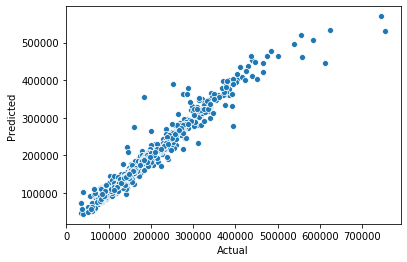

In [34]:
#ax = sns.scatterplot(x="Actual", y="Predicted", data=comparison)
#ax = sns.scatterplot(x="Actual", y="Predicted", hue="Error", data=comparison)

#rides[:24*10].plot(x='dteday', y='cnt')

markers = {"Actual": "s", "Predicted": "X"}
ax = sns.scatterplot(x="Actual", y="Predicted",
                     markers=markers,
                     data=comparison)

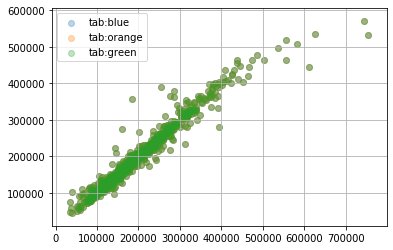

In [35]:
#ax = sns.scatterplot(x=y_test, y=y_pred)
comparison.index
# np.random.seed(19680801)
fig, ax = plt.subplots()
for color in ['tab:blue', 'tab:orange', 'tab:green']:
#    n = 3476
#     x, y = np.random.rand(2, n)
#     scale = 200.0 * np.random.rand(n)
    ax.scatter(x="Actual", y="Predicted", c=color, label=color,
               alpha=0.3, data=comparison)

ax.legend()
ax.grid(True)

plt.show()

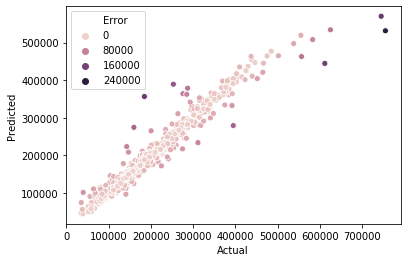

In [36]:
# The scatter plot with error as a metric of very few large errors are there. 
# Mostly result of prediction vs actual is linear
ax = sns.scatterplot(x="Actual", y="Predicted", hue="Error", data=comparison)

In [41]:
### Results & Conclusion
1. The resulst are good.
2. The scatter plot with error as a metric of very few large errors are there.
3. Mostly result of prediction vs actual is linear
4. Accuarcy rate of **Pipeline Mthod** is **85.05%** and mean error is **29436** which is good in the sense of house price prediction.
5. Accuarcy can be improvised with looking at other factors and feature engineering or trying different model could be an option.

SyntaxError: invalid syntax (<ipython-input-41-5a54add9cc82>, line 2)